<a href="https://colab.research.google.com/github/Aytsan11/AI-DL/blob/main/%D0%9B%D0%B0%D0%B1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [3]:
!unzip '/content/train-cat-rabbit.zip'

Archive:  /content/train-cat-rabbit.zip
   creating: cat/
  inflating: cat/cat.6.jpg           
  inflating: cat/cat.749.jpg         
  inflating: cat/cat.775.jpg         
  inflating: cat/cat.761.jpg         
  inflating: cat/cat.588.jpg         
  inflating: cat/cat.239.jpg         
  inflating: cat/cat.577.jpg         
  inflating: cat/cat.211.jpg         
  inflating: cat/cat.205.jpg         
  inflating: cat/cat.563.jpg         
  inflating: cat/cat.359.jpg         
  inflating: cat/cat.403.jpg         
  inflating: cat/cat.365.jpg         
  inflating: cat/cat.371.jpg         
  inflating: cat/cat.417.jpg         
  inflating: cat/cat.198.jpg         
  inflating: cat/cat.30.jpg          
  inflating: cat/cat.629.jpg         
  inflating: cat/cat.24.jpg          
  inflating: cat/cat.167.jpg         
  inflating: cat/cat.601.jpg         
  inflating: cat/cat.615.jpg         
  inflating: cat/cat.18.jpg          
  inflating: cat/cat.173.jpg         
  inflating: cat/cat.614.jpg  

In [4]:
!unzip '/content/test-images.zip'

Archive:  /content/test-images.zip
   creating: cat/
  inflating: cat/cat.239.jpg         
  inflating: __MACOSX/cat/._cat.239.jpg  
  inflating: cat/cat.210.jpg         
  inflating: __MACOSX/cat/._cat.210.jpg  
  inflating: cat/cat.238.jpg         
  inflating: __MACOSX/cat/._cat.238.jpg  
  inflating: cat/.DS_Store           
replace __MACOSX/cat/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: cat/cat.233.jpg         
  inflating: __MACOSX/cat/._cat.233.jpg  
  inflating: cat/cat.236.jpg         
  inflating: __MACOSX/cat/._cat.236.jpg  
  inflating: cat/cat.237.jpg         
  inflating: __MACOSX/cat/._cat.237.jpg  
  inflating: cat/cat.235.jpg         
  inflating: __MACOSX/cat/._cat.235.jpg  
  inflating: cat/cat.209.jpg         
  inflating: __MACOSX/cat/._cat.209.jpg  
  inflating: cat/cat.208.jpg         
  inflating: __MACOSX/cat/._cat.208.jpg  
  inflating: cat/cat.234.jpg         
  inflating: __MACOSX/cat/._cat.234.jpg  
   creating: rabbit/
  inflating: r

In [6]:
!unzip '/content/val-cat-rabbit.zip'

Archive:  /content/val-cat-rabbit.zip
   creating: cat/
  inflating: cat/cat.6.jpg           
  inflating: cat/cat.205.jpg         
  inflating: cat/cat.198.jpg         
  inflating: cat/cat.30.jpg          
  inflating: cat/cat.24.jpg          
  inflating: cat/cat.167.jpg         
  inflating: cat/cat.18.jpg          
  inflating: cat/cat.173.jpg         
  inflating: cat/cat.172.jpg         
  inflating: cat/cat.19.jpg          
  inflating: cat/cat.166.jpg         
  inflating: cat/cat.25.jpg          
  inflating: cat/cat.31.jpg          
  inflating: cat/cat.199.jpg         
  inflating: cat/cat.204.jpg         
  inflating: cat/cat.7.jpg           
  inflating: cat/cat.5.jpg           
  inflating: cat/cat.206.jpg         
  inflating: cat/cat.27.jpg          
  inflating: cat/cat.33.jpg          
  inflating: cat/cat.158.jpg         
  inflating: cat/cat.170.jpg         
  inflating: cat/cat.164.jpg         
  inflating: cat/cat.165.jpg         
  inflating: cat/cat.171.jpg    

In [8]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
import shutil
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train = '/content/train'
test = '/content/test'
valid = '/content/valid'

In [37]:
image_size = (150, 150)
classes = ['cat', 'rabbit']

In [15]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)

    random_image = random.choice(os.listdir(target_folder))

    img = mpimg.imread(os.path.join(target_folder, random_image))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (300, 300, 3)


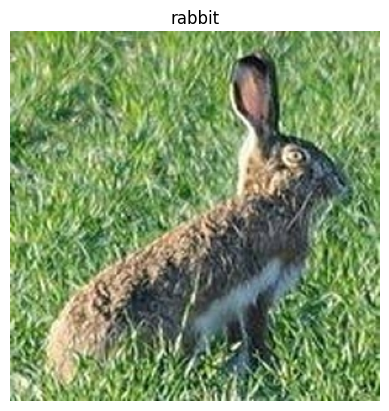

In [16]:
img = view_random_image(train,"rabbit")

In [20]:
tf.random.set_seed(11)
datagen = ImageDataGenerator(rescale=1/255)

augment = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255,
)

In [38]:
class_mode = 'binary'

train_data = augment.flow_from_directory(train, batch_size=55, target_size=image_size, class_mode=class_mode, seed=11)
test_data = datagen.flow_from_directory(test, batch_size=5, target_size=image_size, class_mode=class_mode, seed=11)
valid_data = datagen.flow_from_directory(valid, batch_size=5, target_size=image_size, class_mode=class_mode, seed=11)

Found 1600 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Found 414 images belonging to 2 classes.


In [39]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
epochs = 10
history_1 = model_1.fit(train_data, epochs=epochs, validation_data=valid_data)
acc = model_1.evaluate(test_data)
print(np.array(acc)[1].round(2))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5719 - loss: 0.6652 - val_accuracy: 0.6739 - val_loss: 0.5908
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7384 - loss: 0.5478 - val_accuracy: 0.6135 - val_loss: 0.5702
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6969 - loss: 0.5407 - val_accuracy: 0.6932 - val_loss: 0.5364
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7235 - loss: 0.5109 - val_accuracy: 0.7295 - val_loss: 0.5092
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7853 - loss: 0.4734 - val_accuracy: 0.7681 - val_loss: 0.4768
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7814 - loss: 0.4633 - val_accuracy: 0.7923 - val_loss: 0.4682
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7824 - loss: 0.4523 - val_accuracy: 0.7512 - val_loss: 0.4744
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7646 - loss: 0.4806 - val_accuracy: 0.7633 - val_loss:

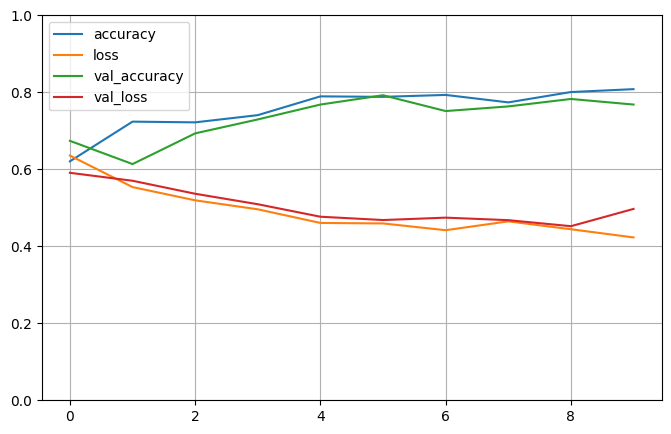

In [40]:
pd.DataFrame(history_1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


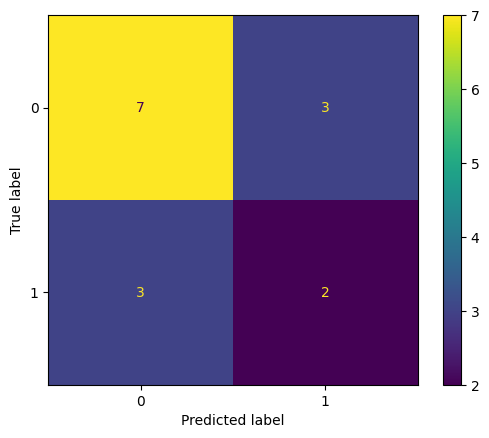

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


y_true = test_data.classes
y_pred_probs = model_1.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

#матрица путаницы
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_true, y_pred))

In [42]:
model_2 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
epochs = 8
history_2 = model_2.fit(train_data, epochs=epochs, validation_data=valid_data)
acc = model_2.evaluate(test_data)
print(np.array(acc)[1].round(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.4935 - loss: 0.8812 - val_accuracy: 0.5024 - val_loss: 0.6885
Epoch 2/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.5270 - loss: 0.6875 - val_accuracy: 0.7150 - val_loss: 0.6223
Epoch 3/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.6895 - loss: 0.6045 - val_accuracy: 0.6908 - val_loss: 0.5586
Epoch 4/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.7447 - loss: 0.5136 - val_accuracy: 0.7343 - val_loss: 0.5421
Epoch 5/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.7790 - loss: 0.4610 - val_accuracy: 0.7512 - val_loss: 0.5120
Epoch 6/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.7763 - loss: 0.4639 - val_accuracy: 0.7754 - val_loss: 0.4806
Epoch 7/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.7958 - loss: 0.4411 - val_accuracy: 0.7464 - val_loss: 0.4888
Epoch 8/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.7684 - loss: 0.4623 - val_accuracy: 0.7657 - val_loss:

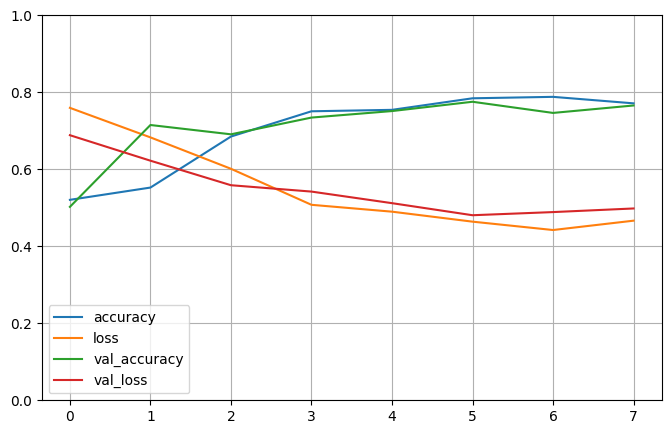

In [43]:
pd.DataFrame(history_2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


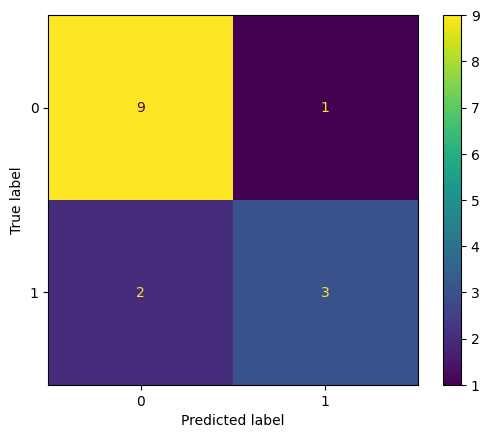

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.78      0.75      0.76        15
weighted avg       0.80      0.80      0.79        15



In [44]:
y_true = test_data.classes
y_pred_probs = model_2.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

#матрица путаницы
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_true, y_pred))

In [49]:
model_3 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
epochs = 8
history_3 = model_3.fit(train_data, epochs=epochs, validation_data=valid_data)
acc = model_3.evaluate(test_data)
print(np.array(acc)[1].round(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 175s 6s/step - accuracy: 0.5287 - loss: 0.7074 - val_accuracy: 0.6449 - val_loss: 0.6492
Epoch 2/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 196s 5s/step - accuracy: 0.6924 - loss: 0.5853 - val_accuracy: 0.6836 - val_loss: 0.5518
Epoch 3/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.7488 - loss: 0.5110 - val_accuracy: 0.7657 - val_loss: 0.4984
Epoch 4/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 172s 6s/step - accuracy: 0.7517 - loss: 0.4902 - val_accuracy: 0.7754 - val_loss: 0.4800
Epoch 5/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.7709 - loss: 0.4541 - val_accuracy: 0.7754 - val_loss: 0.4861
Epoch 6/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.7812 - loss: 0.4584 - val_accuracy: 0.7874 - val_loss: 0.4828
Epoch 7/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 165s 5s/step - accuracy: 0.8104 - loss: 0.4335 - val_accuracy: 0.7585 - val_loss: 0.4661
Epoch 8/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 167s 6s/step - accuracy: 0.7475 - loss: 0.4750 - val_accuracy: 0.7705 - val_loss:

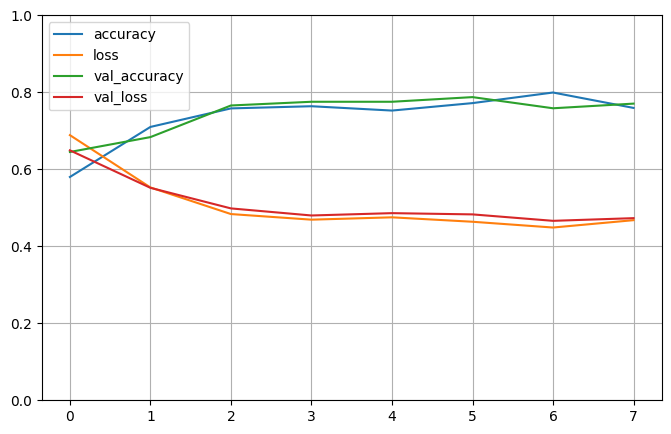

In [50]:
pd.DataFrame(history_3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


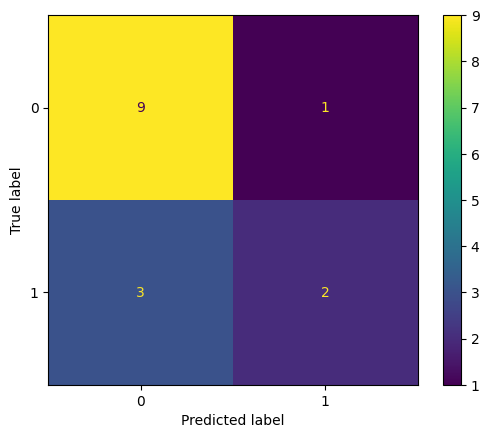

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.67      0.40      0.50         5

    accuracy                           0.73        15
   macro avg       0.71      0.65      0.66        15
weighted avg       0.72      0.73      0.71        15



In [51]:
y_true = test_data.classes
y_pred_probs = model_3.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

#матрица путаницы
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_true, y_pred))